# DENSITY FUNCTIONAL THEORY USING PYSCF 

In this tutorial we will discuss how to perform Density Functional Theory calculations for various molecules using the PySCF library.


## Setup 

### Installing libraries

In [2]:
! pip install pyscf 

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


### Import required modules

In [3]:
from pyscf import gto
from pyscf import dft

## Introduction to DFT

The wave function is a useful mathematical construct for calculating the total energy of atoms and molecules, as well as other features. However, it can be very computationally expensive to compute even for few particle systems. Hence, the DFT is useful for predicting the behaviour of particles in a quantum system. 

### The many body problem 



<img src="~/Desktop/poteq.jpg" width="100" height="40">

This is the potential energy term of the Schodinger's equation of a many particle system. 

<img src="~/Desktop/kineq.jpg" width="100" height="40">

This is the kinetic energy term of the Schodinger's equation of a many particle system.

As we can see from the equations, the summation is over all electrons and ions in the system, which would be of the order of 10^23 particles , resulting in a large number of unknown variables.
Reference: [1]

### Kohn Sham Density Functional Theory


## Building the Molecule 

- The 'gto' command is used to initialise the molecule.
- The three numbers beside the atom determine it's coordinates in the basis system. (most calculations do not use the planar system as it yields inaccurate results)

NOTE: The basis determines the accuracy of the calculations. The number of Kohn Sham equations depends on the basis that has been chosen. If the basis chosen is more localised on the molecule, the number of equations will be less. It is similar to the concept of "data fitting" where the right initial guess equation must be chosen for a better fit. 


The example shown below is for a water molecule 

In [10]:

mol = gto.M(
    atom = '''
    O  0.   0.       0.
    H  0.   2.       0.
    H  0.   0.       2. ''',
    basis = 'ccpvdz')

Exchange Correlation Functional 


Numerical Grids

Either rectangular or radial grids may be used depending on the problem. The examples in this tutorial use rectangular grids. An example below (where the molecule is the water molecule built above) shows the difference between two difference grids being used, just for reference.

In [11]:
method = dft.KS(mol)
print('Default DFT(LDA).  E = %.12f' % method.kernel())
method = dft.KS(mol)
method.grids.radi_method = dft.mura_knowles
print('Changed radial grids for DFT.  E = %.12f' % method.kernel())

converged SCF energy = -75.5217424548572
Default DFT(LDA).  E = -75.521742454857
converged SCF energy = -75.5217423020953
Changed radial grids for DFT.  E = -75.521742302095


Simple Example 1- Hydrogen Fluoride:

This example shows how to calculate the molecular orbital energy using the Kohn Shahm Density Functional theory. Here we are using a pre defined basis and xc functional known as the 

In [29]:
import pyscf
mol = pyscf.M(
    atom = 'H 0 0 0; F 0 0 1.1', 
    basis = '631g',
    symmetry = True,
)
mf = mol.KS()
mf.xc = 'pbe0'
mf.kernel()
mf.analyze()

converged SCF energy = -100.291540824411
-100.29154082441072
99.70845917558928


converged SCF energy = -100.305123028129
converged SCF energy = -100.305123028129
converged SCF energy = -100.307844305017
converged SCF energy = -100.305123028129
converged SCF energy = -100.305123028129
converged SCF energy = -100.307844305017
converged SCF energy = -100.305123028129
converged SCF energy = -100.305123028129
converged SCF energy = -100.307844305017
converged SCF energy = -100.305123028129
converged SCF energy = -100.305123028129
converged SCF energy = -100.307844305017
converged SCF energy = -100.305123028129
converged SCF energy = -100.305123028129
converged SCF energy = -100.307844305017
converged SCF energy = -100.305123028129
converged SCF energy = -100.305123028129
converged SCF energy = -100.307844305017
converged SCF energy = -100.305123028129
converged SCF energy = -100.305123028129
converged SCF energy = -100.307844305017
converged SCF energy = -100.305123028129
converged SCF energy = -100.305123028129
converged SCF energy = -100.307844305017
converged SCF en

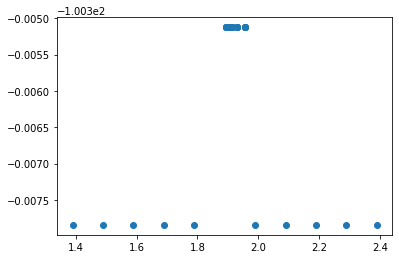

In [46]:
import pyscf
import math 
import matplotlib.pyplot as plt
mol = pyscf.M(
    atom = 'H 0 0 0; F 0 0 1.0', 
    basis = '631g',
    symmetry = True,
)
mf = mol.KS()
mf.xc = 'pbe0'
def gen_moles(mol, disp):
    j=0
    coords = mol.atom_coords()
    natoms = len(coords)
    mol_a, mol_s = [],[]
    cscf=[]
    bondl=[]
    for k in range(5):
        for i in range(natoms):
            for x in range(3):
                new_coords_a, new_coords_s = coords.copy(), coords.copy()
                new_coords_a[i][x] += disp
                atoma = [[mol.atom_symbol(j), coord] for (j, coord) in zip(range(natoms), new_coords_a)]
                bondl.append(math.dist(new_coords_a[0],new_coords_a[1]))               
                mol_a.append(mol.set_geom_(atoma, inplace=False, unit='B'))
                mf = mol_a[x].KS()
                mf.xc = 'pbe0' 
                cscf.append(mf.kernel())
        disp=disp+0.1
    plt.scatter(bondl,cscf)
    plt.show() 
gen_moles(mol,0.1)

Result Analysis for example 1

As seen from the output, the 


## Citations:
 - [1] Clark, S., 2012. The Many-Electron Schrödinger Equation. [online] Cmt.dur.ac.uk. Available at: <http://cmt.dur.ac.uk/sjc/thesis_mcg/node161.html> [Accessed 10 June 2022].
 - [2] Baseden, Kyle A., and Jesse W. Tye. "Introduction to density functional theory: calculations by hand on the helium atom." Journal of Chemical Education 91.12 (2014): 2116-2123.